## Configuration

The configuration is the design of the neural network, it has the following parameters:  

1. loss: this is the metric for the loss function, and it can be: 'mse'=mean squared error (for continuous data), or 'ce' for cross entropy (for binary data)
2. distance_metric: this is the distance metric between the distributions and can either be 'mmd': maximum mean discrepency, or kl: Kullback–Leibler (see this blog for details: https://ermongroup.github.io/blog/a-tutorial-on-mmd-variational-autoencoders/)
3. mmd_weight: this is how much you want to force the VAE to learn 

We're going to use two types of VAEs, 1 a normal VAE for the numeric quality data, 2 a conv VAE for the sequence data. To make the training data for the Conv VAE we want to one hot encode it such that each entry is is the sequence

e.g. our kmer would look like this if it was ATACAAC
```
A|1 0 1 0 1 1 0|
T|0 1 0 0 0 0 0|
G|0 0 0 0 0 0 0|
C|0 0 0 1 0 0 1| 
```
We want to do this with a filter that goes across 2 or more columns at once that we we can capture the spatial information. So we need to one hot encode in a special way (i.e. to make the columns)

In [16]:
import os
import pandas as pd
import sys
sys.path.append('../')
from scibacr import *

output_folder = '../data/'
ref_folder = '../data/'
runs = os.listdir(output_folder)


wt = ['ERR5767183']
ko = ['ERR5767181']
species_runs = wt + ko
bams = [f'{output_folder}{run}' for run in runs if '.bai' not in run and '_genome.sorted' not in run and 'bam' in run]
bams = [b for b in bams if b.split('/')[-1].split('.')[0] in species_runs]

## Count reads to genes
info = pd.read_csv(f'{ref_folder}combined_SRA_cleaned_short.csv')
reference = info[info.Run == species_runs[0]].Reference.values[0]


gtf = f'{ref_folder}{reference}_genomic.gff'
fasta = f'{ref_folder}{reference}_transcripts.fna'
# ID=gene-b0941;Dbxref=ASAP:ABE-0003191,ECOCYC:G6483,GeneID:947185;Name=elfG;gbkey=Gene;gene=elfG;gene_biotype=protein_coding;gene_synonym=ECK0932,ycbT;locus_tag=b0941

#count_df = count_reads(bams, gtf, info_cols=['gene', 'gene_biotype'])
#count_df_nn = count_df[mean_counts > 2.5]

for bam in bams:
    print(bam)
    read_dict = gen_mapping_gene_read_dict_transcriptome(bam, gtf)
    output_name = f'{output_folder}training_new/{bam.split("/")[-1].split(".")[0]}_training.h5'
    gen_training_h5py_position(bam, fasta, read_dict,
                                   output_filename=output_name,
                                   min_coverage=20, max_coverage=100)
    


[W::hts_idx_load3] The index file is older than the data file: ../data/ERR5767181.sorted.bam.bai


NC_000001.11:0-248956422
NC_000001.11:11873-14409
NC_000001.11:11873-14409
NC_000001.11:11873-12227
NC_000001.11:12612-12721
NC_000001.11:13220-14409
NC_000001.11:14361-29370
NC_000001.11:14361-29370
NC_000001.11:29320-29370
NC_000001.11:24737-24891
NC_000001.11:18267-18366
NC_000001.11:17914-18061
NC_000001.11:17605-17742
NC_000001.11:17232-17368
NC_000001.11:16857-17055
NC_000001.11:16606-16765
NC_000001.11:15795-15947
NC_000001.11:14969-15038
NC_000001.11:14361-14829
NC_000001.11:17368-17436
NC_000001.11:17368-17436
NC_000001.11:17368-17436
NC_000001.11:17368-17391
NC_000001.11:17368-17391
NC_000001.11:17408-17431
NC_000001.11:17408-17431
NC_000001.11:29773-35418
NC_000001.11:29773-35418
NC_000001.11:29773-30667
NC_000001.11:30975-31093
NC_000001.11:34167-35418
NC_000001.11:30365-30503
NC_000001.11:30365-30503
NC_000001.11:30365-30503
NC_000001.11:30437-30458
NC_000001.11:30437-30458
NC_000001.11:34610-36081
NC_000001.11:34610-36081
NC_000001.11:35720-36081
NC_000001.11:35276-35481


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NC_000005.10:138006989-138007147
NC_000005.10:137988273-137988315
NC_000005.10:137987460-137987616
NC_000005.10:137985256-137985389
NC_000005.10:137962404-137962469
NC_000005.10:137960165-137960214
NC_000005.10:137959615-137959763
NC_000005.10:137956476-137956542
NC_000005.10:137954165-137954376
NC_000005.10:137953335-137953465
NC_000005.10:137952627-137952709
NC_000005.10:137948954-137949184
NC_000005.10:137945901-137945997
NC_000005.10:137943132-137943216
NC_000005.10:137942874-137943038
NC_000005.10:137941943-137942045
NC_000005.10:137937959-137940348
NC_000005.10:137940224-137940348
NC_000005.10:137937959-138033079
NC_000005.10:138032781-138033079
NC_000005.10:138021030-138021197
NC_000005.10:138018954-138019146
NC_000005.10:138018301-138018514
NC_000005.10:138011767-138011945
NC_000005.10:138011007-138011149
NC_000005.10:138006989-138007147
NC_000005.10:137988273-137988315
NC_000005.10:137987460-137987616
NC_000005.10:137985256-137985389
NC_000005.10:137962404-137962469
NC_000005.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


KeyboardInterrupt



In [57]:
annotated_kmers = pd.read_csv(f'/Users/ariane/Documents/code/modpred/data/human_kmer_predicted.csv')
annotated_kmers

0 predicted_label
0      AAAAAACC             m1A
1      AAAAAACT             m1A
2      AAAAAAGA             NaN
3      AAAAAAGC             NaN
4      AAAAAAGG             NaN
...         ...             ...
10758  ttttttgt               Y
10759  ttttttta               Y
10760  tttttttc             NaN
10761  tttttttg               Y
10762  tttttttt             NaN

[10763 rows x 2 columns]

In [42]:
    
# Create a training dataset
training_run = f'{output_folder}training_new/ERR5767183_training_m6A.h5' # Use a S-minus sample
kmer_len = 8
training_df = create_train_chunked_set([training_run], kmer_len, max_read_count=20)

# Train the VAE
training_df.to_csv(f'{output_folder}training_data_m6A.csv', index=False)
# Now we need to replcae the deletions, let's replace with 0 for now, sometimes I do mean...
training_df = training_df.replace(np.nan, 0) # 

test_data = training_df.values[:, 4:]
test_data = test_data / np.max(test_data)
test_data = np.array(test_data).astype(float)
test_labels = training_df[: 1]

#f'{output_folder}training_new/{bam.split("/")[-1].split(".")[0]}_training_m6A.h5'

In [58]:
m6A_pos = pd.read_csv(f'/Users/ariane/Documents/code/modpred/data/human_m6A-m5C-Y.csv')
starts = training_df['Start'].values
training_df['position_id'] = [f'{g}-{starts[i]}' for i, g in enumerate(training_df['Gene'].values)]
m6A_training = training_df[training_df['position_id'].isin(m6A_pos['position_id'].values)]

In [87]:
m6A_training.to_csv(f'/Users/ariane/Documents/code/modpred/data/human_m6A-m5C-Y_training.csv', index=False)

In [54]:
training_df = training_df[[c for c in training_df.columns if c != 'position_id']]

test_data = training_df.values[:, 4:]
test_data = test_data / np.max(test_data)
test_data = np.array(test_data).astype(float)
test_labels = training_df[: 1]

In [63]:
m6A_training = m6A_training[[c for c in m6A_training.columns if c != 'position_id']]
test_data = m6A_training.values[:, 4:]
test_data = test_data / np.max(test_data)
test_data = np.array(test_data).astype(float)
test_labels = m6A_training[: 1]
m6A_training

Run                Gene  \
4562     ../data/training_new/ERR5767183_training_m6A.h5             rna-ND5   
4756     ../data/training_new/ERR5767183_training_m6A.h5             rna-ND5   
5767     ../data/training_new/ERR5767183_training_m6A.h5             rna-ND5   
6026     ../data/training_new/ERR5767183_training_m6A.h5             rna-ND5   
6349     ../data/training_new/ERR5767183_training_m6A.h5             rna-ND5   
...                                                  ...                 ...   
2840200  ../data/training_new/ERR5767183_training_m6A.h5  rna-XM_047441479.1   
2840201  ../data/training_new/ERR5767183_training_m6A.h5  rna-XM_047441479.1   
2840841  ../data/training_new/ERR5767183_training_m6A.h5  rna-XM_047441479.1   
2840842  ../data/training_new/ERR5767183_training_m6A.h5  rna-XM_047441479.1   
2840843  ../data/training_new/ERR5767183_training_m6A.h5  rna-XM_047441479.1   

         ID  Start    4    5     6    7     8     9  ...   26    27    28  \
4562      2     16  0.0  0.0  12.0  0.0   0.0  16.0  ...  0.0   0.0   4.0   
4756      2     16  0.0  0.0  22.0  0.0   0.0   6.0  ...  0.0   0.0   3.0   
5767      2     16  0.0  0.0  13.0  0.0   8.0   6.0  ...  0.0   0.0   4.0   
6026      2     16  0.0  0.0   4.0  0.0   6.0   5.0  ...  0.0   0.0   6.0   
6349      2     16  0.0  0.0  23.0  0.0   0.0  18.0  ...  0.0   0.0  17.0   
...      ..    ...  ...  ...   ...  ...   ...   ...  ...  ...   ...   ...   
2840200   4     32  0.0  0.0   0.0  0.0   0.0   0.0  ...  0.0  13.0   0.0   
2840201   5     40  0.0  0.0   0.0  0.0   0.0   0.0  ...  0.0   0.0  20.0   
2840841   3     24  0.0  0.0   0.0  0.0  15.0   0.0  ...  0.0  19.0  12.0   
2840842   4     32  0.0  0.0   0.0  0.0   0.0   0.0  ...  0.0   6.0   0.0   
2840843   5     40  0.0  0.0   0.0  0.0   0.0   0.0  ...  0.0   0.0  11.0   

           29    30    31    32   33    34    35  
4562      0.0   0.0   0.0   0.0  0.0   0.0  17.0  
4756      0.0   0.0   0.0   0.0  0.0   0.0  10.0  
5767      0.0   0.0   0.0   0.0  0.0   0.0   5.0  
6026      0.0   0.0   0.0   0.0  0.0  11.0  11.0  
6349      0.0   0.0   0.0   0.0  0.0   0.0   6.0  
...       ...   ...   ...   ...  ...   ...   ...  
2840200   0.0  27.0  22.0  16.0  0.0  14.0   0.0  
2840201   0.0   0.0   3.0   0.0  0.0   0.0   0.0  
2840841  19.0   0.0   0.0   0.0  0.0  20.0   0.0  
2840842   0.0  23.0  25.0  18.0  0.0   6.0   0.0  
2840843  21.0   0.0  11.0   0.0  0.0   0.0   0.0  

[6433 rows x 36 columns]

In [34]:
# gen_kmer_sliding_window_ref(fasta, 5, f'{output_folder}kmer_5_bac.h5', genes)

# from collections import defaultdict
# kmer_counts = defaultdict(int)
# kmer_h5 = h5py.File(f'{output_folder}kmer_5_bac.h5', 'r')
# for kmer in kmer_h5:
#     kmer_data = kmer_h5[kmer]
#     for k in kmer_data.keys():
#         #for position in kmer_data[k]:
#         kmer_counts[kmer] += 1
# kmer_h5.close()

# dict(sorted(kmer_counts.items(), key=lambda item: item[1], reverse=True))



In [69]:
test_data[np.nonzero(test_data)] = 1

In [70]:
test_data

array([[[[0.],
         [0.],
         [1.],
         ...,
         [1.],
         [0.],
         [0.]],

        [[0.],
         [1.],
         [0.],
         ...,
         [0.],
         [1.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [1.]]],


       [[[0.],
         [0.],
         [1.],
         ...,
         [1.],
         [0.],
         [0.]],

        [[0.],
         [1.],
         [0.],
         ...,
         [0.],
         [1.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [1.]]],


       [[[0.],
         [0.],
         [1.],
         ...,
         [1.],
         [0.],
         [0.]],

        [[0.],
         [1.],
         [0.

(4, 8)
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 4, 8, 1)]    0           []                               
                                                                                                  
 conv2d_39 (Conv2D)             (None, 2, 4, 32)     320         ['default_input[0][0]']          
                                                                                                  
 batch_normalization_78 (BatchN  (None, 2, 4, 32)    128         ['conv2d_39[0][0]']              
 ormalization)                          

Epoch 43/100
342/342 [==============================] - 3s 8ms/step - loss: 0.6591 - val_loss: 0.6790
Epoch 44/100
342/342 [==============================] - 3s 8ms/step - loss: 0.6570 - val_loss: 0.6770
Epoch 45/100
342/342 [==============================] - 2s 7ms/step - loss: 0.6555 - val_loss: 0.6761
Epoch 46/100
342/342 [==============================] - 2s 6ms/step - loss: 0.6560 - val_loss: 0.6740
Epoch 47/100
342/342 [==============================] - 2s 7ms/step - loss: 0.6543 - val_loss: 0.6731
Epoch 48/100
342/342 [==============================] - 2s 6ms/step - loss: 0.6524 - val_loss: 0.6726
Epoch 49/100
342/342 [==============================] - 2s 6ms/step - loss: 0.6499 - val_loss: 0.6692
Epoch 50/100
342/342 [==============================] - 2s 6ms/step - loss: 0.6492 - val_loss: 0.6697
Epoch 51/100
342/342 [==============================] - 2s 6ms/step - loss: 0.6486 - val_loss: 0.6674
Epoch 52/100
342/342 [==============================] - 2s 5ms/step - loss: 0.6469

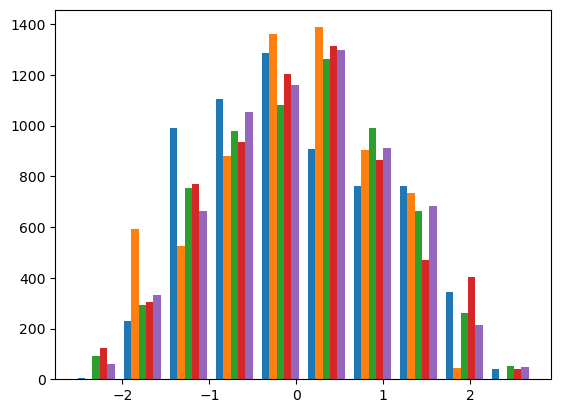

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_18821/3337893454.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])


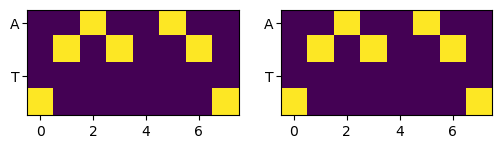

202/202 [==============================] - 0s 1ms/step


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_18821/3337893454.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])


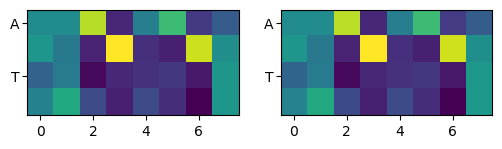

In [86]:
# Actually run the VAE

from scivae import ConvVAE
config = {'scale_data': False,
         'input_size': (4, kmer_len),
          'batch_norm': True,
         'loss': {'loss_type': 'ce', 'distance_metric': 'mmd', 'mmd_weight': 0.5},
          'encoding': {'layers': [{'filters': 32, 'kernel_size': 3, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'selu'}
                                  ]},
          'decoding': {'layers': [
                                  {'filters': 32, 'kernel_size': 3, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'selu'}, 
                                   
                                  {'filters': 1, 'kernel_size': 3, 'strides': 2, 'padding': 'same',
                                   'activation_fn': None}
                                 ]},
            
            'latent': {'num_nodes': 5}, 'optimiser': {'params': {'learning_rate': 0.01}, 'name': 'adam'}

}

test_data = np.array([d.reshape((4, kmer_len, 1)) for d in test_data])
# Run the VAE 
cvae = ConvVAE(test_data, test_data, test_labels, config, 'cvae')
# The more epochs you run the better (until some point so would recomend more though it wil take longer)
cvae.encode('default', epochs=100, batch_size=16, early_stop=True)
# get the encoded data
seq_encoding = cvae.get_encoded_data()

## -------- Look at whether the VAE looks good

import matplotlib.pyplot as plt
plt.hist(seq_encoding)  # Has a nice normal dist
plt.show()

# Show some of the kmers (4)
n = 2
seqs_encoding = cvae.get_encoded_data()
# Show the true data
plt.figure(figsize=(6, 3))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])
    ax.tick_params(axis='y', which='major', pad=2.0)
    plt.imshow(test_data[i].reshape(4, kmer_len))

plt.show()

# Show the prediction of the test data (i.e. using the test data how does it get reconstructed)
d = cvae.decoder.predict(seqs_encoding)

plt.figure(figsize=(6, 3))
n = 2
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])
    ax.tick_params(axis='y', which='major', pad=2.0)
    plt.imshow(d[i,:].reshape(4, kmer_len))
plt.show()

# ----- Save VAE
cvae.save(f'model_weights_{kmer_len}.h5', f'model_optimiser_{kmer_len}.json', f'config_{kmer_len}.json') # looks pretty decent for a single node 

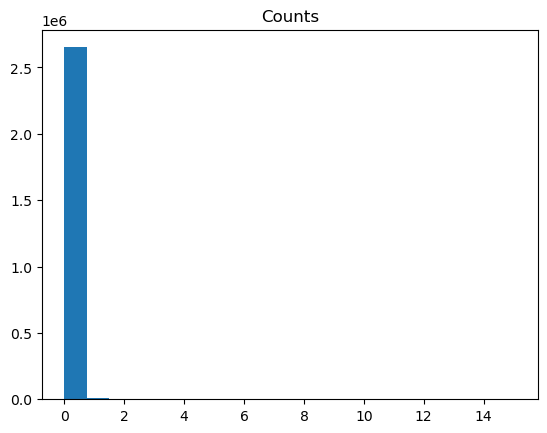

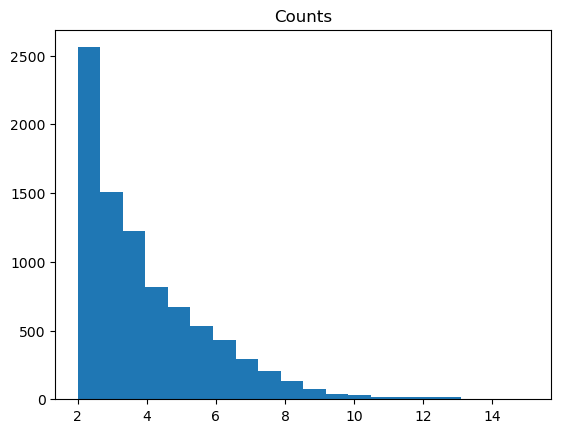

In [24]:
mean_counts = np.mean(count_df[[c for c in count_df.columns if 'RR' in c]], axis=1)
plt.hist(np.log2(mean_counts + 1), bins=20)
plt.title('Counts')
plt.show()

count_df_nn = count_df[mean_counts > 2.5]
# Drop any genes that didn't have any counts then save
count_df_nn.to_csv(f'{output_folder}counts_abundent.csv', index=False)

mean_counts = np.mean(count_df_nn[[c for c in count_df_nn.columns if 'RR' in c]], axis=1)
plt.hist(np.log2(mean_counts + 1), bins=20)
plt.title('Counts')
plt.show()
### Write a MSEA

In [25]:
count_df_nn

gene                  id          gene gene_biotype  \
7           rna-NR_024540.1     rna-NR_024540.1        WASH7P         None   
210      rna-XR_007065318.1  rna-XR_007065318.1  LOC100996442         None   
527         rna-NM_015658.4     rna-NM_015658.4         NOC2L         None   
841         rna-NM_005101.4     rna-NM_005101.4         ISG15         None   
965         rna-NM_198576.4     rna-NM_198576.4          AGRN         None   
...                     ...                 ...           ...          ...   
2668783            rna-ND4L            rna-ND4L          ND4L         None   
2668787             rna-ND4             rna-ND4           ND4         None   
2668800             rna-ND5             rna-ND5           ND5         None   
2668804             rna-ND6             rna-ND6           ND6         None   
2668811            rna-CYTB            rna-CYTB          CYTB         None   

         ERR5767181  ERR5767183  
7                32          19  
210              51          35  
527             110          98  
841              59          80  
965               4          11  
...             ...         ...  
2668783         354         471  
2668787        2245        1531  
2668800         274         204  
2668804         274         214  
2668811        2120        1750  

[8604 rows x 6 columns]